# Kappa Test

## Testing of Kappa integer requirement on the system

In [5]:
import sys
sys.path.append('../')

### cadCAD Specification Diagram

In [7]:
# For displaying image files
from IPython.display import Image

In [9]:
# Image("..\images\Phase_3_secondary.png")
# print(sys.path)

### Import Libraries for Analysis and Visualization

In [11]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

### Installed cadCAD Installed Version Check

In [13]:
pip freeze | grep cadCAD

cadCAD==0.4.23
Note: you may need to restart the kernel to use updated packages.


### Import Parent cadCAD Model and Utilities

In [15]:
from cadCAD.configuration import Experiment

from cadCAD import configs

from src.config_wrapper import ConfigWrapper

# from src import run_wrapper2
from src import run_wrapper

import src.sim as sim

# custom plotting function
from src.utils import param_test_plot

### Choose number of Monte Carlo runs ('N') and/or number of Timesteps ('T') and/or to update parameter values ('M') 

### Current N, T, and M

In [17]:
# get list of keys and values from M
parametric_experiment = ConfigWrapper(sim)
model_keys = parametric_experiment.get_config()
model_keys[0]

{'N': 1,
 'T': range(0, 500),
 'M': {'starting_kappa': 2,
  'starting_alpha': 0.03536977491961415,
  'money_raised': 66000,
  'monthly_instalment': 3000,
  'C': 72000,
  'f': 0.03,
  'm': 0.15,
  'beta': 0.9,
  'dust': 1e-08,
  'period': 1200,
  'rules_price': 'martin',
  'E': 0.2,
  'ENABLE_CONTINUOUS': True,
  'THETA': 0.9,
  'ENABLE_BURN': False,
  'fee_numerator': 997,
  'fee_denominator': 1000,
  'alpha_bias': 1,
  'price_bias': 1,
  'kappa_rule': 'round'}}

### Choose a parameter and list of values to sweep over

In [19]:
new_kappa = 2

In [21]:
update_params = {
    'ENABLE_BURN' : [False],
    # 'monthly_instalment' : [3000],
    # 'money_raised' : [6000],
    # 'E' : [0.2, 0.3],
    'starting_kappa' : [new_kappa],
    'kappa_rule' : ['none']
}

### Update Timesteps, if desired
Current Number of TImesteps

In [23]:
# Original
New_Timesteps = model_keys[0]['T']

# New Change Value
New_Timesteps = range(365)
New_Timesteps

range(0, 365)

### Update Monte Carlo Runs, if desired
Current Number of Runs

In [25]:
# Original
New_Runs = model_keys[0]['N']

# New Change Value
# New_Runs = 10
New_Runs

1

In [27]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [29]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'}}]

In [31]:
initial_state = parametric_experiment.get_initial_conditions()

In [33]:
initial_state

{'reserve': 6599.999999999998,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 132000.0,
 'alpha': 0.0003362783161627586,
 'alpha_bar': 0.0003362783161627586,
 'supply_0': 30000,
 'supply_1': 100,
 'supply_free': 132000.0,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 100,
 'invariant_V': 2640000.000000001,
 'invariant_I': 9146.623794212217,
 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0   0                     0                     0            100   
 1   1                     0                     0            100   
 
    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
 0               0               0                  0                  0.5   
 1               0               0                  0                  0.5   
 
    agent_private_price  agent_private_alpha_signal  \
 0                  0.5                           0   
 1                  0.5                 

### Update Initial Conditions based on new starting kappa

In [35]:
initial_state['kappa'] = new_kappa
initial_state['supply'] = new_kappa * model_keys[0]['M']['money_raised'] / initial_state['spot_price']
initial_state['supply_free'] = initial_state['supply']
initial_state['invariant_V'] = (initial_state['supply']**initial_state['kappa']) / initial_state['reserve']


In [37]:
parametric_experiment = ConfigWrapper(sim, M=update_params, N=New_Runs, T=New_Timesteps)

In [39]:
parametric_experiment.get_initial_conditions()

{'reserve': 6599.999999999998,
 'pbar': 1,
 'realized_price': 0,
 'spot_price': 1,
 'kappa': 2,
 'supply': 132000.0,
 'alpha': 0.0003362783161627586,
 'alpha_bar': 0.0003362783161627586,
 'supply_0': 30000,
 'supply_1': 100,
 'supply_free': 132000.0,
 'attestations': 30000,
 'attestations_0': 30000,
 'attestations_1': 100,
 'invariant_V': 2640000.000000001,
 'invariant_I': 9146.623794212217,
 'agents':    id  agent_attestations_1  agent_attestations_0  agent_reserve  \
 0   0                     0                     0            100   
 1   1                     0                     0            100   
 
    agent_supply_1  agent_supply_0  agent_supply_free  agent_private_alpha  \
 0               0               0                  0                  0.5   
 1               0               0                  0                  0.5   
 
    agent_private_price  agent_private_alpha_signal  \
 0                  0.5                           0   
 1                  0.5                 

In [41]:

del configs[:]

parametric_experiment.append()

In [43]:
parametric_experiment.get_config()

[{'N': 1,
  'T': range(0, 365),
  'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'}}]

### Generate config_ids to match results with swept variable input

In [45]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

In [47]:
config_ids

[{'M': {'starting_kappa': 2,
   'starting_alpha': 0.03536977491961415,
   'money_raised': 66000,
   'monthly_instalment': 3000,
   'C': 72000,
   'f': 0.03,
   'm': 0.15,
   'beta': 0.9,
   'dust': 1e-08,
   'period': 1200,
   'rules_price': 'martin',
   'E': 0.2,
   'ENABLE_CONTINUOUS': True,
   'THETA': 0.9,
   'ENABLE_BURN': False,
   'fee_numerator': 997,
   'fee_denominator': 1000,
   'alpha_bias': 1,
   'price_bias': 1,
   'kappa_rule': 'none'},
  'simulation_id': 0,
  'run_id': 0,
  'subset_id': 0}]

### Execute cadCAD Simulation

In [49]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (365, 20, 1, 19)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [1]
Execution Mode: single_threaded
Total execution time: 1.53s


In [51]:
experiments.head()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,invariant_V,invariant_I,agents,chosen_agent,public_alpha,simulation,subset,run,substep,timestep
0,0,6600.0,1.000000,0,1.000000,2.000000,132000.000000,0.000336,0.000336,30000,...,2.640000e+06,9146.623794,id agent_attestations_1 agent_attestation...,0,0,0,0,1,0,0
1,5,6600.0,1.000000,0,0.050183,1.003668,132000.000000,0.000336,0.000336,30000,...,2.088405e+01,6624.212039,id agent_attestations_1 agent_attestatio...,"{'id': 1, 'agent_attestations_1': 0, 'agent_at...",0,0,0,1,5,1
2,10,6610.0,0.050185,0,0.051141,1.036695,133992.634916,0.003306,0.000336,30000,...,3.126220e+01,6724.212038,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.32944705...",0,0,0,1,5,2
3,15,6610.0,0.051141,0,0.052119,1.056505,133992.634935,0.005087,0.000336,30000,...,3.949884e+01,6848.013365,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.52881384...",0,0,0,1,5,3
4,20,6610.0,0.051141,0,0.052608,1.066432,133992.634935,0.006036,0.000336,30000,...,4.441014e+01,6976.250879,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.63559117...",0,0,0,1,5,4


In [53]:
experiments.tail()

,index,reserve,pbar,realized_price,spot_price,kappa,supply,alpha,alpha_bar,supply_0,...,invariant_V,invariant_I,agents,chosen_agent,public_alpha,simulation,subset,run,substep,timestep
361,1805,6620.0,-1.717985e-308,0,0.05575,1.144356,135885.383099,0.013273,0.000336,30000,...,113.062044,7575.633877,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.74406996...",0,0,0,1,5,361
362,1810,6620.0,-1.717985e-308,0,0.05575,1.144356,135885.383099,0.013273,0.000336,30000,...,113.062044,7575.633877,id agent_attestations_1 agent_attestatio...,"{'id': 1.0, 'agent_attestations_1': 0.70198457...",0,0,0,1,5,362
363,1815,6620.0,-1.717985e-308,0,0.05575,1.144356,135885.383099,0.013273,0.000336,30000,...,113.062044,7575.633877,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.74406996...",0,0,0,1,5,363
364,1820,6620.0,-1.717985e-308,0,0.05575,1.144356,135885.383099,0.013273,0.000336,30000,...,113.062044,7575.633877,id agent_attestations_1 agent_attestatio...,"{'id': 1.0, 'agent_attestations_1': 0.70198457...",0,0,0,1,5,364
365,1825,6620.0,-1.717985e-308,0,0.05575,1.144356,135885.383099,0.013273,0.000336,30000,...,113.062044,7575.633877,id agent_attestations_1 agent_attestatio...,"{'id': 0.0, 'agent_attestations_1': 0.74406996...",0,0,0,1,5,365


In [55]:
len(experiments)

366

### Bonded funds are split into backing the bond (into reserve fund) and backing the project (funds_from_bond).

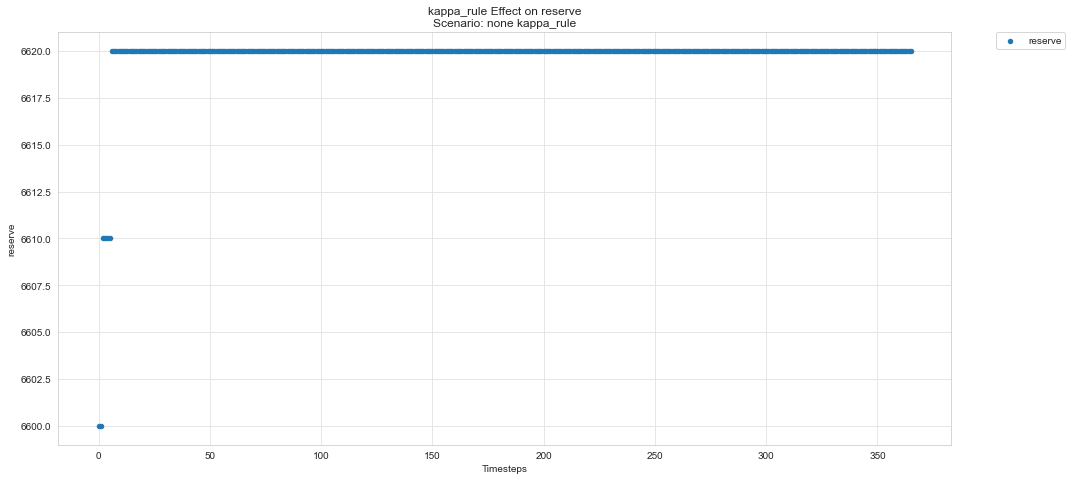

In [57]:
param_test_plot(experiments, config_ids, 'kappa_rule','reserve')

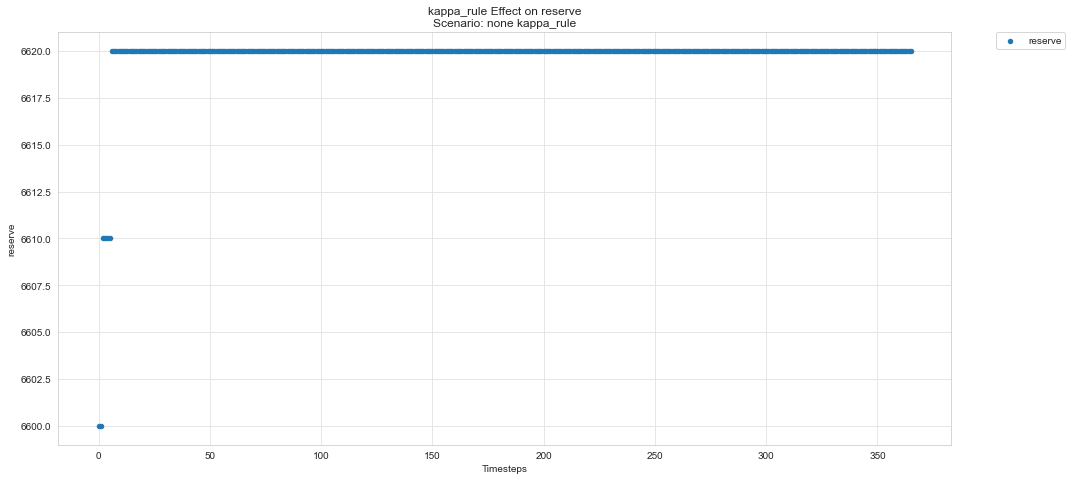

In [59]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'reserve')

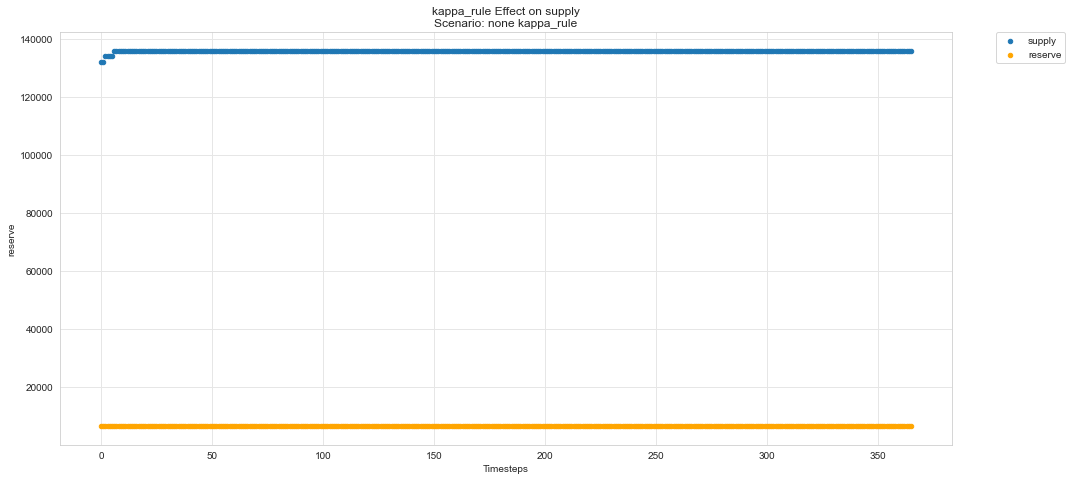

In [61]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply', 'reserve')

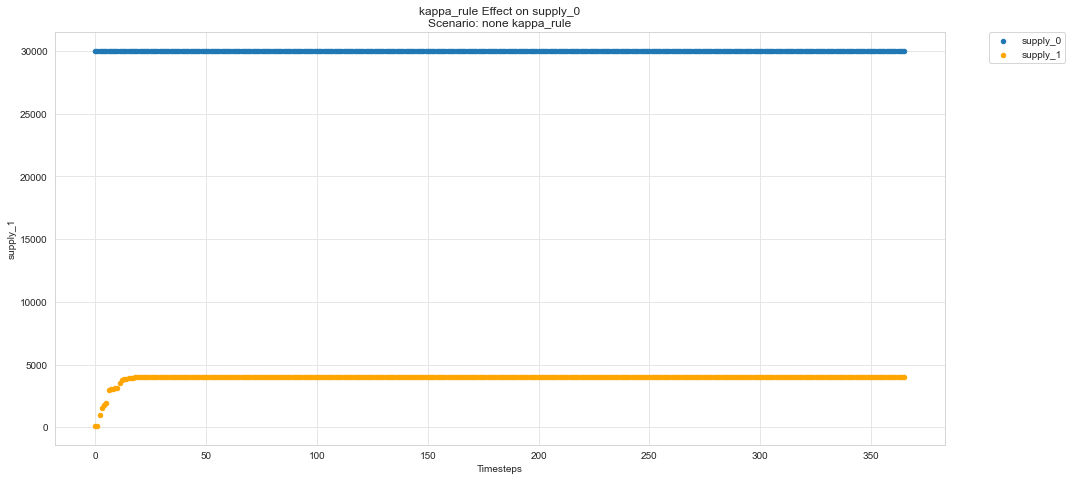

In [63]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply_0', 'supply_1')

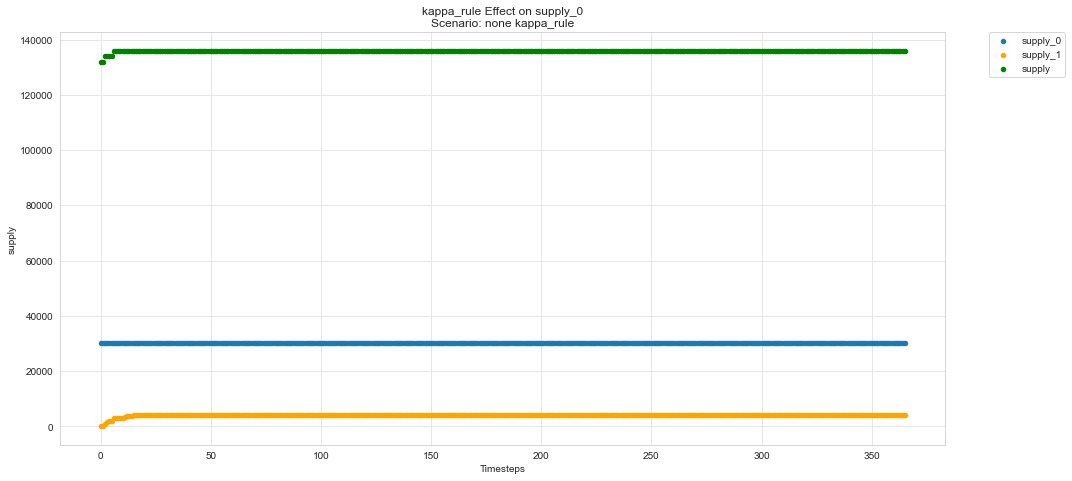

In [65]:
param_test_plot(experiments, config_ids, 'kappa_rule','supply_0', 'supply_1', 'supply')

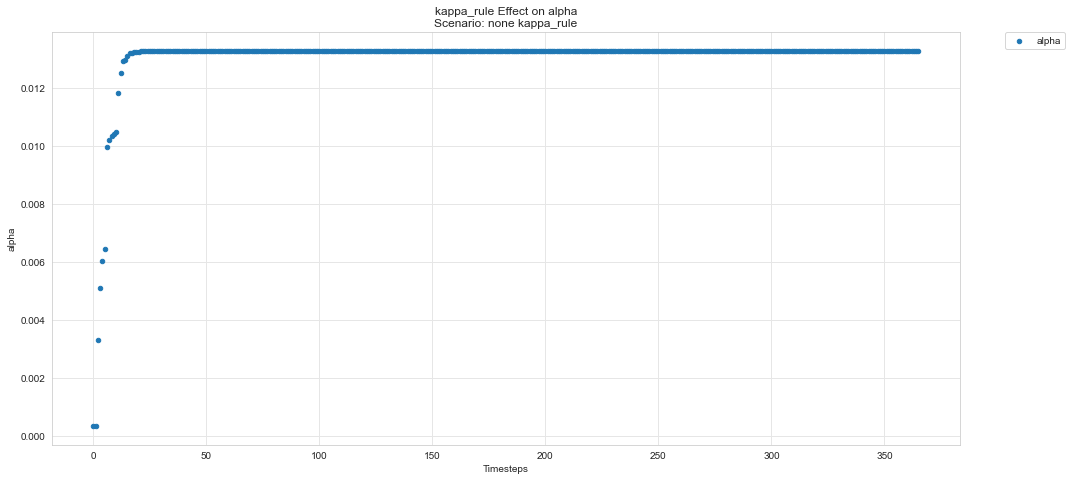

In [67]:
param_test_plot(experiments, config_ids, 'kappa_rule','alpha')

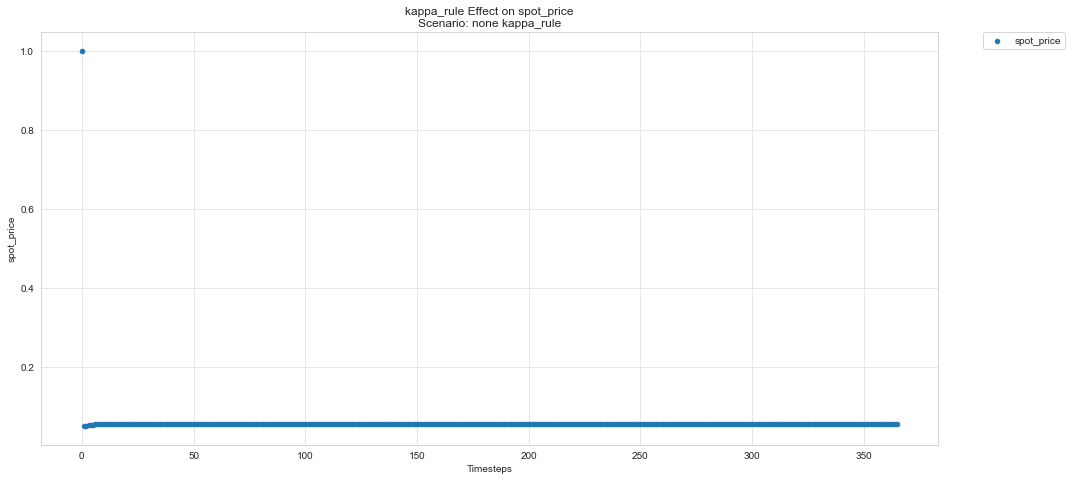

In [68]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'spot_price')

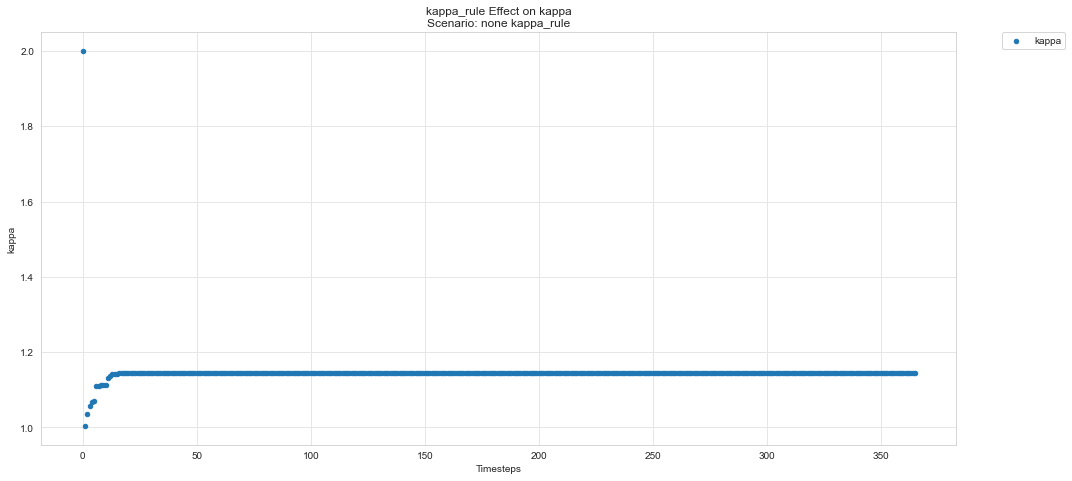

In [69]:
param_test_plot(experiments, config_ids, 'kappa_rule', 'kappa')

### Use for customizing plots

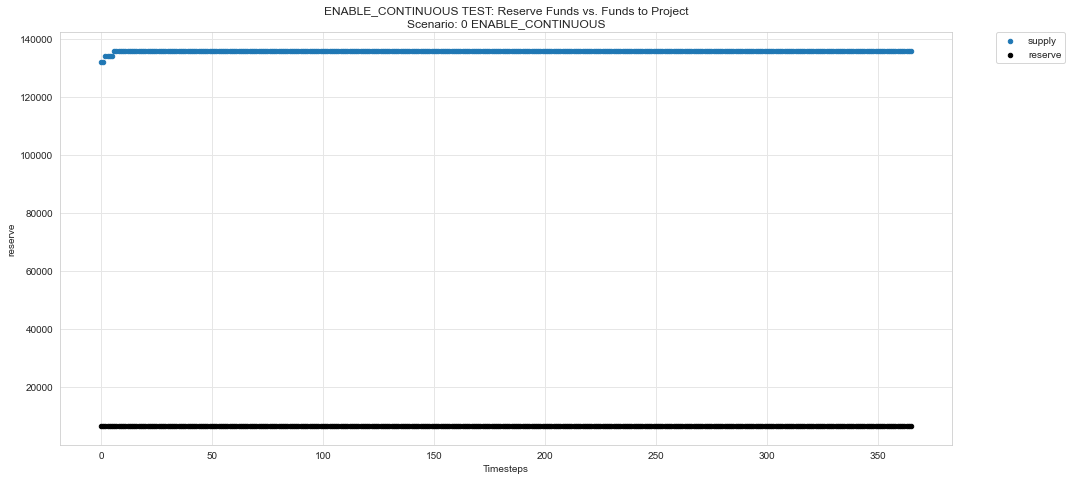

In [70]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
cols = 1
rows = 1
cc_idx = 0
while cc_idx<len(experiments):
    cc = experiments.iloc[cc_idx]['subset']
    cc_label = experiments.iloc[cc_idx]['subset']
#     secondary_label = experiments.iloc[cc_idx]['string']
    sub_experiments = experiments[experiments['subset']==cc]
    cc_idx += len(sub_experiments)
    fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

    df = sub_experiments.copy()
    colors = ['b','orange', 'g', 'magenta', 'r', 'k' ]

    ax = axs
    title = 'ENABLE_CONTINUOUS TEST: Reserve Funds vs. Funds to Project' + '\n' + 'Scenario: ' + str(cc_label)  + ' ENABLE_CONTINUOUS'
    # + 'Scenario: ' + str(cc_label)  + ' rules_price'
    ax.set_title(title)
    ax.set_ylabel('Funds')

    df.plot(x='timestep', y='supply', label='supply', ax=ax, legend=True, kind ='scatter')
    df.plot(x='timestep', y='reserve', label='reserve', ax=ax, legend=True, color = colors[5], kind ='scatter')

    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set_xlabel('Timesteps')
    ax.grid(color='0.9', linestyle='-', linewidth=1)

    plt.tight_layout()
        
fig.tight_layout(rect=[0, 0, 1, .97])
fig.patch.set_alpha(1)
display(fig)
plt.close()